In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [44]:
df=pd.read_csv("Sample - Superstore.csv", encoding="latin1")

##### No. of Columns and Rows

In [45]:
df.shape

(9994, 21)

#### Column names

In [46]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### Data Types

In [47]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

#### Missing Values

In [48]:
null=df.isnull().sum()
null

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### Duplicates

In [49]:
dropp=df.duplicated().sum()
print(dropp)

0


#### Convert all dates into Same format

In [50]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order Date'].head()

0   2016-11-08
1   2016-11-08
2   2016-06-12
3   2015-10-11
4   2015-10-11
Name: Order Date, dtype: datetime64[ns]

In [51]:
df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Ship Date'].head()

0   2016-11-11
1   2016-11-11
2   2016-06-16
3   2015-10-18
4   2015-10-18
Name: Ship Date, dtype: datetime64[ns]

#### Max & Min Sales by city

In [52]:
max_region=df.groupby('Region')['Sales'].sum().reset_index()
max_sort=max_region.sort_values(by='Sales',ascending=False)
max_sort.head(1)

,Region,Sales
3,West,725457.8245


In [53]:
min_region=df.groupby('Region')['Sales'].sum().reset_index()
min_sort=min_region.sort_values(by='Sales',ascending=False)
min_sort.tail(1)

,Region,Sales
2,South,391721.905


In [54]:
region_sales=df.groupby('Region')['Sales'].sum().reset_index()
region_sales

,Region,Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


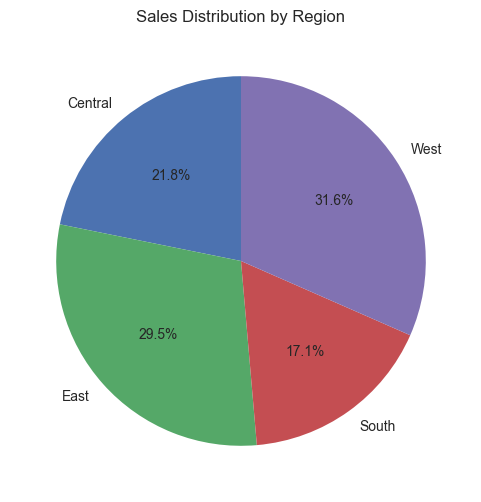

In [55]:
plt.figure(figsize=(6,6))
plt.pie(region_sales['Sales'], labels=region_sales['Region'], autopct='%1.1f%%', startangle=90)
plt.title("Sales Distribution by Region")
plt.show()

#### Aggregation

In [56]:
high_sales=df.groupby('Product Name')[['Sales','Profit']].sum().reset_index()
high_sales=high_sales.sort_values(by='Sales',ascending=False)
neg_profit=high_sales[high_sales['Profit']<0]
neg_profit.head()

,Product Name,Sales,Profit
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480,-1811.0784
683,GBC DocuBind P400 Electric Binding System,17965.068,-1878.1662
813,High Speed Automatic Electric Letter Opener,17030.312,-262.0048
985,Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730
1043,Martin Yale Chadless Opener Electric Letter Op...,16656.200,-1299.1836


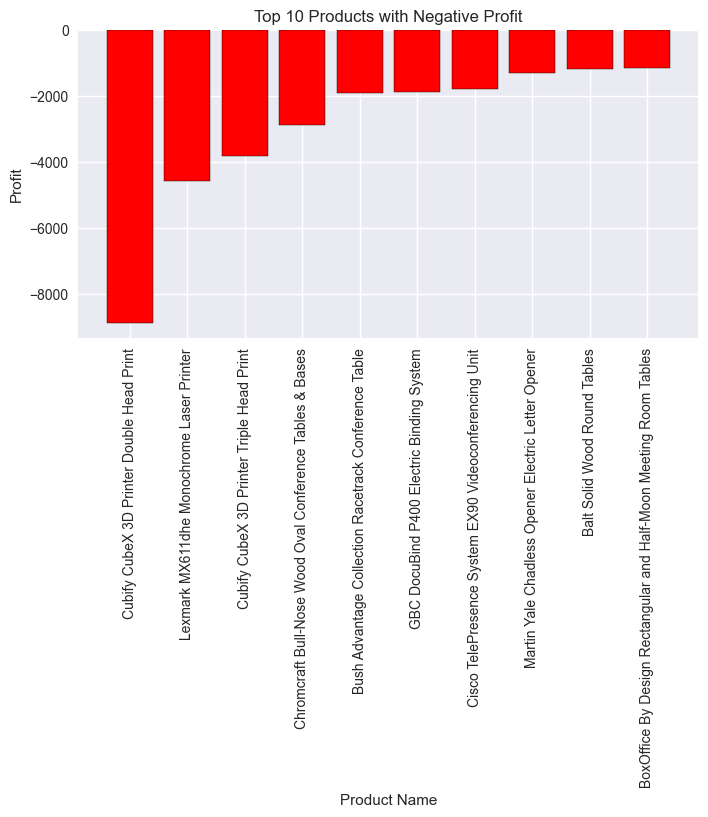

In [57]:
top_neg_profit = neg_profit.sort_values(by='Profit').head(10)

plt.figure(figsize=(8,4))
plt.bar(top_neg_profit['Product Name'], top_neg_profit['Profit'], color='red', edgecolor='black')

plt.title("Top 10 Products with Negative Profit")
plt.xlabel("Product Name")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()


#### Yearly Sales

In [58]:
df['year']=df['Order Date'].dt.year
yearly_sales=df.groupby('year')['Sales'].sum().reset_index()
yearly_sales

,year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


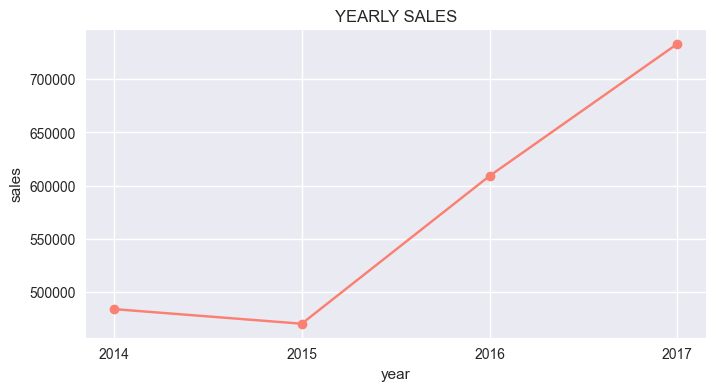

In [59]:
plt.figure(figsize=(8,4))
plt.plot(yearly_sales['year'],yearly_sales['Sales'],color='Salmon',marker='o')
plt.title("YEARLY SALES")
plt.xlabel("year")
plt.ylabel("sales")
plt.xticks(yearly_sales['year'])
plt.grid(True)
plt.show()

#### Peak Sales Month

In [60]:
df['month']=df['Order Date'].dt.month
peak_month=df.groupby('month')['Sales'].sum().reset_index()
peak_month

,month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


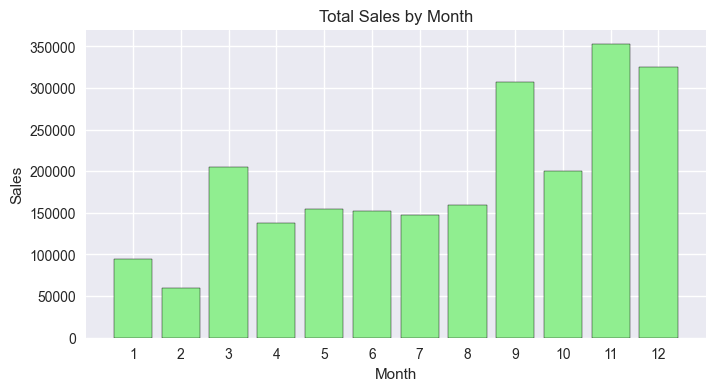

In [61]:
plt.figure(figsize=(8,4))
plt.bar(peak_month['month'], peak_month['Sales'], color='lightgreen', edgecolor='black')

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(peak_month['month'])
plt.show()


#### Total Sales per customer

In [62]:
top_customers=df.groupby('Customer Name')['Sales'].sum().reset_index()
top_customers=df.sort_values(by='Sales',ascending=False)
top_customers[['Customer Name','Sales']].head(10)

,Customer Name,Sales
2697,Sean Miller,22638.480
6826,Tamara Chand,17499.950
8153,Raymond Buch,13999.960
2623,Tom Ashbrook,11199.968
4190,Hunter Lopez,10499.970
9039,Adrian Barton,9892.740
4098,Sanjit Chand,9449.950
4277,Bill Shonely,9099.930
8488,Sanjit Engle,8749.950
6425,Christopher Conant,8399.976


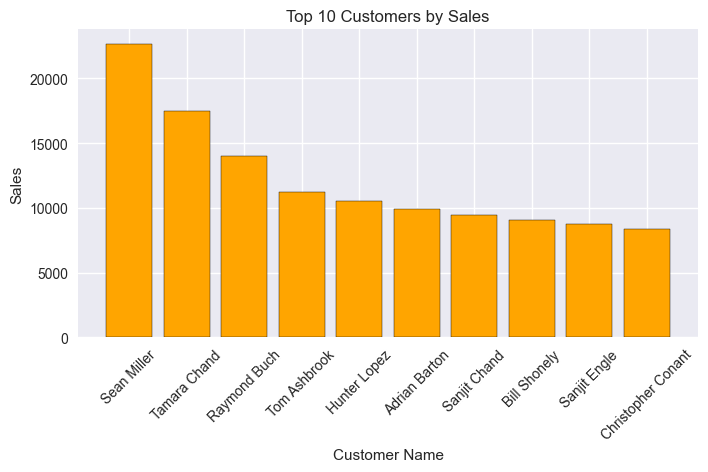

In [63]:
top10_customers = top_customers[['Customer Name','Sales']].head(10)
plt.figure(figsize=(8,4))
plt.bar(top10_customers['Customer Name'], top10_customers['Sales'], color='orange', edgecolor='black')

plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer Name")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()


#### Linear Alebra

In [64]:
sales = df["Sales"].values
profit = df["Profit"].values

sales_norm = np.linalg.norm(sales)
profit_norm = np.linalg.norm(profit)
print(sales_norm)
print(profit_norm)
sales_normalized = sales / sales_norm
profit_normalized = profit / profit_norm
print(sales_normalized)
print(profit_normalized)

66405.23706115548
23592.394658472396
[0.00394487 0.01102232 0.00022016 ... 0.00389391 0.00044575 0.00366176]
[0.00177657 0.00930732 0.00029125 ... 0.00082201 0.00056459 0.00309201]


In [65]:
dot_sp = np.dot(sales, profit)
print(dot_sp)

764782004.0339246


In [66]:
cosine_similarity = dot_sp / (sales_norm * profit_norm)
print(cosine_similarity)


0.488161251911481


#### Probability

In [67]:
A = df['Discount'] > 0.2
B = df['Profit'] < 0
P_A = A.mean()
P_B = B.mean()

P_B_given_A = ((A & B).sum()) / A.sum()

P_A_given_B = (P_B_given_A * P_A) / P_B

print("P(Discount > 20% | Loss) =", round(P_A_given_B, 4))


P(Discount > 20% | Loss) = 0.7205


In [68]:
joint_prob = (
    ((df['Category'] == 'Technology') & (df['Region'] == 'West')).mean()
)
print(joint_prob)

0.05993596157694617


#### Statistics

In [69]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,year,month
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654


In [70]:
corr_matrix = df[['Sales','Profit','Discount','Quantity']].corr()
print(corr_matrix)




             Sales    Profit  Discount  Quantity
Sales     1.000000  0.479064 -0.028190  0.200795
Profit    0.479064  1.000000 -0.219487  0.066253
Discount -0.028190 -0.219487  1.000000  0.008623
Quantity  0.200795  0.066253  0.008623  1.000000


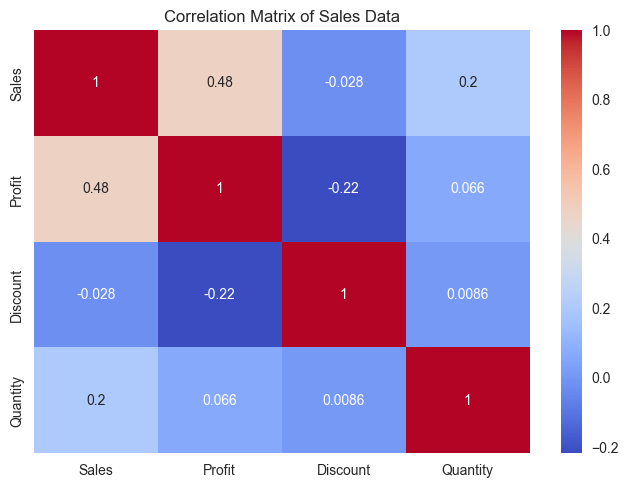

In [71]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Sales Data")
plt.show()

#### Differential Calculus

In [72]:
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

discount_profit_slope = discount_profit.diff()

discount_profit_slope

,Discount,Profit
0,NaN,NaN
1,0.10,29.154782
2,0.05,-68.766776
3,0.05,-2.585726
4,0.10,-70.382208
5,0.02,-42.881019
6,0.08,-23.366774
7,0.05,-114.719035
8,0.05,-84.056992
9,0.10,267.626244


    Discount      Profit  Profit_Slope
0       0.00   66.900292           NaN
1       0.10   96.055074     29.154782
2       0.15   27.288298    -68.766776
3       0.20   24.702572     -2.585726
4       0.30  -45.679636    -70.382208
5       0.32  -88.560656    -42.881019
6       0.40 -111.927429    -23.366774
7       0.45 -226.646464   -114.719035
8       0.50 -310.703456    -84.056992
9       0.60  -43.077212    267.626244
10      0.70  -95.874060    -52.796848
11      0.80 -101.796797     -5.922738


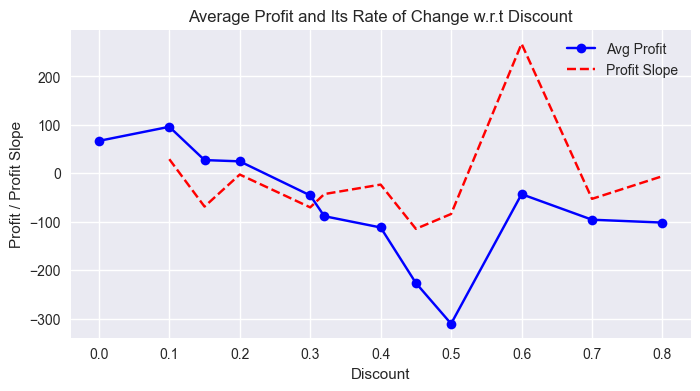

In [73]:
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

discount_profit['Profit_Slope'] = discount_profit['Profit'].diff()

print(discount_profit)
plt.figure(figsize=(8,4))

plt.plot(discount_profit['Discount'], discount_profit['Profit'],
         marker='o', label='Avg Profit', color='blue')

plt.plot(discount_profit['Discount'], discount_profit['Profit_Slope'],
         marker='x', linestyle='--', label='Profit Slope', color='red')

plt.xlabel('Discount')
plt.ylabel('Profit / Profit Slope')
plt.title('Average Profit and Its Rate of Change w.r.t Discount')
plt.legend()
plt.grid(True)
plt.show()

Sales       12.972752
Profit       7.561432
Discount     1.684295
Quantity     1.278545
dtype: float64


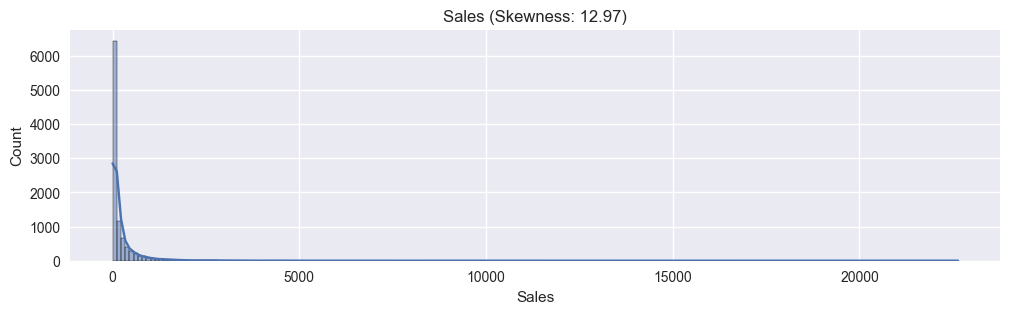

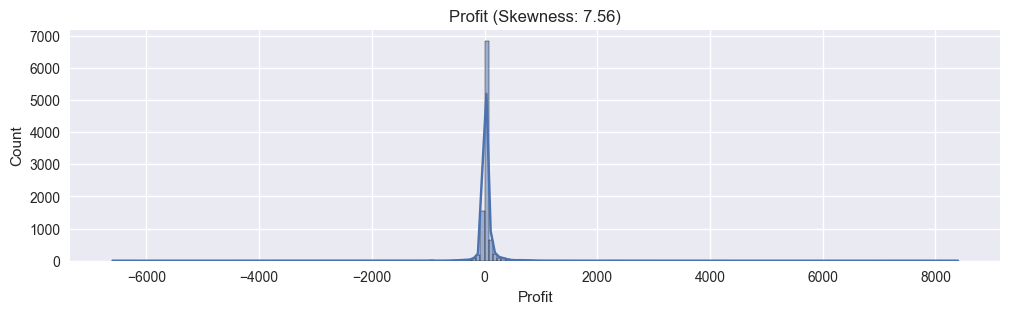

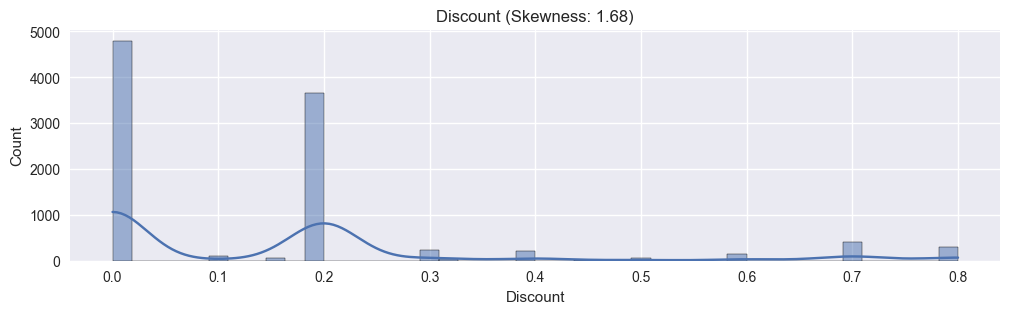

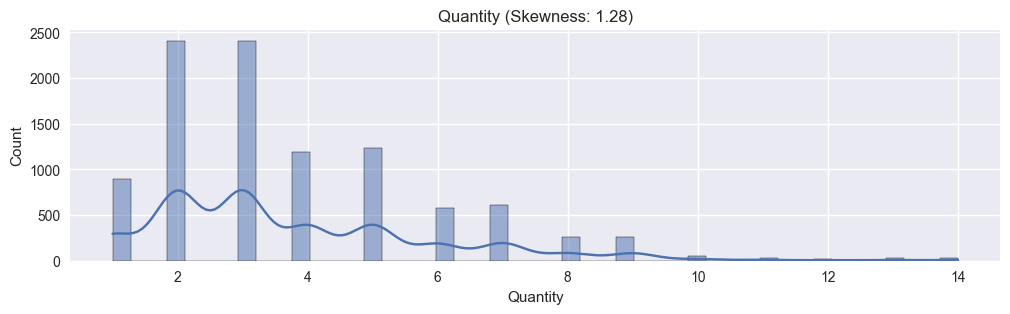

In [74]:
# Select numerical columns
num_cols = ['Sales','Profit','Discount','Quantity']

print(df[num_cols].skew())



for col in num_cols:
    plt.figure(figsize=(12,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} (Skewness: {df[col].skew():.2f})")
    plt.show()


In [ ]:
df['Sales_log'] = np.log1p(df['Sales'])      
df['Quantity_log'] = np.log1p(df['Quantity'])


In [78]:
print(df[['Sales_log','Quantity_log']].skew())


Sales_log       0.281809
Quantity_log    0.190534
dtype: float64


In [79]:
df['Discount_sqrt'] = np.sqrt(df['Discount'])
print(df['Discount_sqrt'].skew())


0.4557761240933803


In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df['Profit_quantile'] = qt.fit_transform(df[['Profit']])

print(df['Profit_quantile'].skew())  

0.002095544740465601
